In [ ]:
from google.colab import files
import io
import pandas as pd

df = pd.read_csv('text_classification_dataset.csv', header=0,usecols = [1,2],encoding='latin-1')
dict2 = {'class': 'cancer', 'a':'text'}
df.rename(columns = dict2,inplace=True)
print("rows and columns:",df.shape)
display(df)

rows and columns: (7570, 2)


,cancer,text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd

np.random.seed(1234)

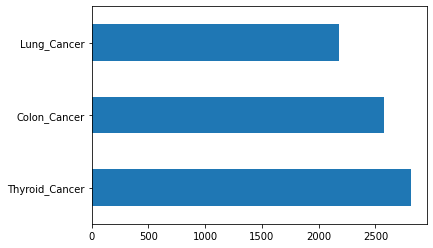

In [ ]:
df['class'].value_counts().plot(kind='barh')

This dataset has two columns with the target being the type of cancer the text classifies. It can either be lung, colon, or thyroid cancer. There is 7570 instances overall. The model should be able to predict the type of cancer the text is describing.

In [ ]:
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print('train data size: ',train.shape)
print('test data size: ', test.shape)

train data size:  (6050, 2)
test data size:  (1520, 2)


In [ ]:
num_labels = 3
vocab_size = 25000
batch_size = 100

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.text)

x_train = tokenizer.texts_to_matrix(train.text, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.text, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.cancer)
y_train = encoder.transform(train.cancer)
y_test = encoder.transform(test.cancer)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (6050, 25000) (6050, 3)
test shapes: (1520, 25000) (1520, 3)
test first five labels: [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


###Sequential

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(3, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30,batch_size=128)

Epoch 1/30
48/48 [==============================] - 1s 19ms/step - loss: 0.4104 - accuracy: 0.8228
Epoch 2/30
48/48 [==============================] - 1s 19ms/step - loss: 0.1233 - accuracy: 0.9469
Epoch 3/30
48/48 [==============================] - 1s 18ms/step - loss: 0.0894 - accuracy: 0.9534
Epoch 4/30
48/48 [==============================] - 1s 18ms/step - loss: 0.0782 - accuracy: 0.9648
Epoch 5/30
48/48 [==============================] - 1s 18ms/step - loss: 0.0742 - accuracy: 0.9628
Epoch 6/30
48/48 [==============================] - 1s 19ms/step - loss: 0.0616 - accuracy: 0.9699
Epoch 7/30
48/48 [==============================] - 1s 19ms/step - loss: 0.0548 - accuracy: 0.9752
Epoch 8/30
48/48 [==============================] - 1s 18ms/step - loss: 0.0546 - accuracy: 0.9742
Epoch 9/30
48/48 [==============================] - 1s 18ms/step - loss: 0.0484 - accuracy: 0.9740
Epoch 10/30
48/48 [==============================] - 1s 18ms/step - loss: 0.0422 - accuracy: 0.9772
Epoch 11/

In [ ]:
score = model.evaluate(x_test,y_test, batch_size=batch_size, verbose = 1)
print('Accuracy: ',score[1])

16/16 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.9776
Accuracy:  0.9776315689086914


###CNN

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(10000, 128, input_length=25000)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(3))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(x_train,y_train, epochs = 5,batch_size=64)

Epoch 1/5
95/95 [==============================] - 1113s 12s/step - loss: 11.0906 - accuracy: 0.3742
Epoch 2/5
95/95 [==============================] - 1110s 12s/step - loss: 11.4372 - accuracy: 0.3732
Epoch 3/5
95/95 [==============================] - 1106s 12s/step - loss: 11.4372 - accuracy: 0.3732
Epoch 4/5
95/95 [==============================] - 1089s 11s/step - loss: 11.4372 - accuracy: 0.3732
Epoch 5/5
95/95 [==============================] - 1045s 11s/step - loss: 11.4372 - accuracy: 0.3732


In [ ]:
score = model.evaluate(x_test,y_test, batch_size=batch_size, verbose = 1)
print('Accuracy: ',score[1])

16/16 [==============================] - 53s 3s/step - loss: 11.6326 - accuracy: 0.3632
Accuracy:  0.36315789818763733


###Embeddings

In [ ]:
from tensorflow.python import metrics
from tensorflow.keras import preprocessing


model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=25000))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25000, 8)          80000     
                                                                 
 flatten (Flatten)           (None, 200000)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                6400032   
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 6,480,131
Trainable params: 6,480,131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
152/152 [==============================] - 16s 100ms/step - loss: 0.6483 - acc: 0.7725 - val_loss: 0.1669 - val_acc: 0.9430
Epoch 2/10
152/152 [=====================

In [ ]:
score = model.evaluate(x_test,y_test, batch_size=batch_size, verbose = 1)
print('Accuracy: ',score[1])

16/16 [==============================] - 1s 52ms/step - loss: 0.0327 - acc: 0.9882
Accuracy:  0.9881578683853149


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow import keras


vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train['text']).batch(128)
vectorizer.adapt(text_ds)
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))


EMBEDDING_DIM = 128
MAX_SEQUENCE_LENGTH = 200

embedding_layer = layers.Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH)

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(3, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560128   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0         
 1D)                                                         

In [ ]:
#x_train = vectorizer(np.array([[s] for s in train['text']])).numpy()
#y_train = np.array(train['cancer'])

model.compile(
    loss="categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train,batch_size=128, epochs=5)

Epoch 1/5
48/48 [==============================] - 1906s 40s/step - loss: 0.9687 - acc: 0.4826
Epoch 2/5
48/48 [==============================] - 1903s 40s/step - loss: 0.7192 - acc: 0.6197
Epoch 3/5
48/48 [==============================] - 1904s 40s/step - loss: 0.5338 - acc: 0.7155
Epoch 4/5
48/48 [==============================] - 1914s 40s/step - loss: 0.4557 - acc: 0.7788
Epoch 5/5
48/48 [==============================] - 1904s 40s/step - loss: 0.3724 - acc: 0.8360


In [ ]:
score = model.evaluate(x_test,y_test, batch_size=batch_size, verbose = 1)
print('Accuracy: ',score[1])

16/16 [==============================] - 126s 8s/step - loss: 0.2745 - acc: 0.9000
Accuracy:  0.8999999761581421


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Embedding


vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(train['text']).batch(128)
vectorizer.adapt(text_ds)
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))


embeddings_index = {}
f = open("glove.6B.100d.txt",'r')
for line in f:
    word, coefs = line.split(maxsplit=1)
    coefs = np.fromstring(coefs, "f", sep=" ")
    embeddings_index[word] = coefs

num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [ ]:
from tensorflow.keras import layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(100, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(100, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(3, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])
model.fit(x_train, y_train,batch_size=128, epochs=5)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         2000200   
                                                                 
 conv1d_20 (Conv1D)          (None, None, 100)         50100     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, None, 100)        0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, None, 100)         50100     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 100)              0         
 balMaxPooling1D)                                          

In [ ]:
from sklearn.metrics import classification_report

score = model.evaluate(x_test,y_test, batch_size=batch_size, verbose = 1)
print('Accuracy: ',score[1])

preds = model.predict(x_test)
test_labels = np.argmax(y_test,axis=1)
pred_labels = [np.argmax(p) for p in preds]
print(classification_report(test_labels, pred_labels))


16/16 [==============================] - 92s 6s/step - loss: 0.4755 - acc: 0.7750
Accuracy:  0.7749999761581421
48/48 [==============================] - 98s 2s/step
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       545
           1       0.85      0.97      0.91       423
           2       0.89      0.55      0.68       552

    accuracy                           0.78      1520
   macro avg       0.80      0.79      0.78      1520
weighted avg       0.80      0.78      0.77      1520



### Analysis 

For this assignment I tried many different approaches on the same data set. The text classification data set I used I got from Kaggle and it has 7570 instances of text from full research papers and abstracts and classifies them as either thyroid, colon, or lung cancer.

The first model I used is a sequential model. It has two dense layers of length 32 with relu activation and then the final layers with 3 soft max activation for the classification. The overall accuracy this model got was 97.7% which was pretty suprising to me for being so high. I think this model did a good job. The next model I tried was a CNN model. This model definitely did not do as well as the first model and only got an accuracy of 36% which is considerably lower than the sequential model. CNNs are typically used for image classification which might have something to do with the lower accuracy. I attemped to do a RNN model but couldn't get it work completely so I was unable to compare results between a CNN and RNN model with this data. The next three models I used are all different embeddding attempts. The first one adds a simple embedding layer into a sequential model. This model got an accuracy of 98.8% which is the highest out of all the models. The second embedding model sets up its own embedding layer instead of using a premade one. This model got an accuracy of 89.9% which isn't as bad as the CNN model but also not as good as the previous embedding model or the plain sequential model. The last model used implements a GloVe pretrained embedding. This model got an accuracy of 78% which much like the second embedding model isn't terrible or as bad as the CNN but also still not as good either the first embedding or plain sequential model. Overall, most of the models I used except for the CNN one, preformed well on the data. I think to improve some of the performance of the models I couldv'e been more detailed in how I processed or cleaned up the text for classification instead of not doing much in that regard and moving straight into dividing the samples into train and test groups. However, looking at the resulting accuracies of most of the models it seems like they still got satisfactory results without that step.